In [46]:
import pandas as pd
from datetime import datetime

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Admissions Hospitalières Nettoyées.csv')

# Convertir la colonne 'Date d'Entrée' en type datetime
df['Date d\'Entrée'] = pd.to_datetime(df['Date d\'Entrée'])

# Séparer les données de 2024 en deux parties
df_2024 = df[df['Date d\'Entrée'].dt.year == 2024]

# Créer une copie des données pour 2025
df_2025 = df_2024.copy()
df_2023 = df_2024.copy()
df_2022 = df_2024.copy()
df_2021 = df_2024.copy()

# Décaler les dates pour 2025 (on garde le mois et le jour, on change l'année)
df_2025['Date d\'Entrée'] = df_2025['Date d\'Entrée'].apply(lambda x: x.replace(year=2025))
df_2023['Date d\'Entrée'] = df_2023['Date d\'Entrée'].apply(lambda x: x.replace(year=2023))
df_2022['Date d\'Entrée'] = df_2022['Date d\'Entrée'].apply(lambda x: x.replace(year=2022))
df_2021['Date d\'Entrée'] = df_2021['Date d\'Entrée'].apply(lambda x: x.replace(year=2021))

# Maintenant, nous voulons imiter la tendance saisonnière :
# Par exemple, augmenter les valeurs pendant l'hiver (décembre à février) et les diminuer pendant l'été (juin à août)

# Définir une fonction pour ajuster les valeurs en fonction de la saison
def adjust_seasonal_trend_2025(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.1  # Augmenter de 10% pour l'hiver
    elif month in [6, 7, 8]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.8  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2023(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2, 3]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.05  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.9  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2022(row):
    month = row['Date d\'Entrée'].month
    if month in [11, 12, 1, 2, 3, 4]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 1.2  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8, 9, 10]:  # Été
        return row['Durée Hospitalisation (jours)'] * 0.95  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

def adjust_seasonal_trend_2021(row):
    month = row['Date d\'Entrée'].month
    if month in [12, 1, 2, 3]:  # Hiver
        return row['Durée Hospitalisation (jours)'] * 0.98  # Augmenter de 10% pour l'hiver
    elif month in [5, 6, 7, 8, 9]:  # Été
        return row['Durée Hospitalisation (jours)'] * 1.2  # Diminuer de 20% pour l'été
    else:
        return row['Durée Hospitalisation (jours)']  # Pas de changement en printemps et automne

# Appliquer l'ajustement saisonnier pour les données de 2025
df_2025['Durée Hospitalisation (jours)'] = df_2025.apply(adjust_seasonal_trend_2025, axis=1)
df_2023['Durée Hospitalisation (jours)'] = df_2023.apply(adjust_seasonal_trend_2023, axis=1)
df_2022['Durée Hospitalisation (jours)'] = df_2022.apply(adjust_seasonal_trend_2022, axis=1)
df_2021['Durée Hospitalisation (jours)'] = df_2021.apply(adjust_seasonal_trend_2021, axis=1)

# Fusionner les deux DataFrames (2024 et 2025)
df_final = pd.concat([df_2021, df_2022, df_2023, df_2024, df_2025], ignore_index=True)

# Sauvegarder le DataFrame final dans un nouveau fichier CSV
df_final.to_csv('Admissions Hospitalières Nettoyées 2021-2025.csv', index=False)

print("Modification des dates et ajustement saisonnier terminés. Le fichier est sauvegardé sous 'fichier_modifie_avec_saison.csv'.")


Modification des dates et ajustement saisonnier terminés. Le fichier est sauvegardé sous 'fichier_modifie_avec_saison.csv'.


Colonnes du DataFrame :
Index(['ID Patient', 'Date d'Entrée', 'Âge', 'Sexe',
       'Durée Hospitalisation (jours)', 'Type Admission', 'Pathologie'],
      dtype='object')
            patients
mois                
2021-01-01        78
2021-01-02       151
2021-01-03       207
2021-01-04       250
2021-01-05       292
...              ...
2026-02-04         2
2026-02-05         1
2026-02-06         1
2026-02-07         1
2026-02-08         1

[1865 rows x 1 columns]
mois
2021-01-31    11233
2021-02-28    12252
2021-03-31     5982
2021-04-30     5277
2021-05-31     5824
2021-06-30     5314
2021-07-31     5857
2021-08-31     6028
2021-09-30     5540
2021-10-31     5233
2021-11-30    13548
2021-12-31    13567
2022-01-31    15621
2022-02-28    16234
2022-03-31     8544
2022-04-30     6092
2022-05-31     4881
2022-06-30     3973
2022-07-31     4327
2022-08-31     4478
2022-09-30     4085
2022-10-31     4184
2022-11-30    14715
2022-12-31    17786
2023-01-31    15229
2023-02-28    14501
2023-

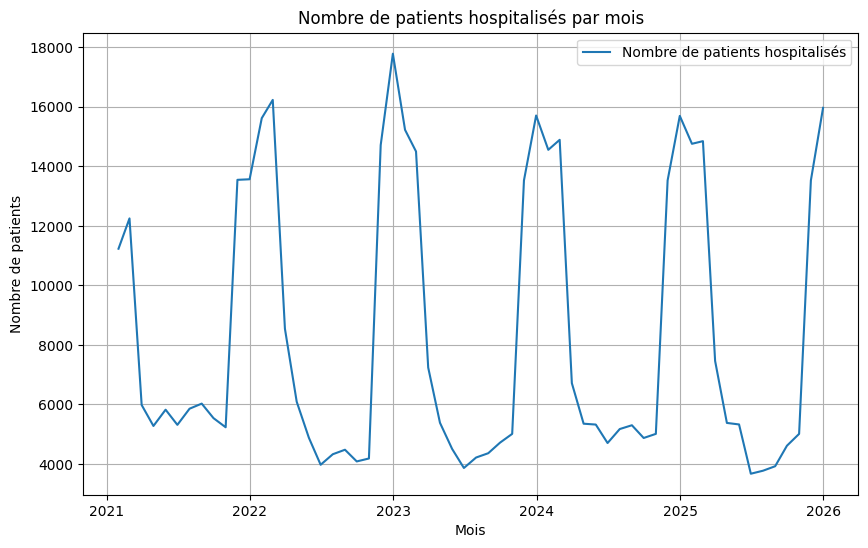

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 📌 Charger et préparer les données médicales
def load_and_prepare_data():
    df = pd.read_csv('Admissions Hospitalières Nettoyées 2021-2025.csv', encoding='utf-8', delimiter=',')
    
    # Supprimer les espaces invisibles autour des noms de colonnes
    df.columns = df.columns.str.strip()

    # Vérification des colonnes
    print("Colonnes du DataFrame :")
    print(df.columns)  # Affichage des colonnes pour vérifier leur contenu exact

    # Sélection des colonnes nécessaires
    selected_columns = ["Date d'Entrée", "Durée Hospitalisation (jours)"]
    df = df[selected_columns]

    # Conversion des dates en format datetime
    df["Date d'Entrée"] = pd.to_datetime(df["Date d'Entrée"], format="%Y-%m-%d", errors='coerce')

    # Assurer que la durée d'hospitalisation est un nombre et remplacer les erreurs par 0
    df["Durée Hospitalisation (jours)"] = pd.to_numeric(df["Durée Hospitalisation (jours)"], errors='coerce').fillna(0)

    # Créer une liste des mois où chaque patient occupe un lit
    nombre_patients_par_mois = []

    for _, row in df.iterrows():
        start_date = row["Date d'Entrée"]
        duration = int(row["Durée Hospitalisation (jours)"])

        # Générer une liste des mois durant lesquels le patient est hospitalisé
        months_range = pd.date_range(start=start_date, periods=duration, freq='D')  # MS : début du mois
        
        # Enregistrer chaque mois où le patient occupe un lit
        for month in months_range:
            nombre_patients_par_mois.append({
                'mois': month,
                'patients': 1
            })

    # Convertir la liste des patients par mois en DataFrame
    df_patients = pd.DataFrame(nombre_patients_par_mois)

    # Grouper par mois et compter le nombre de patients chaque mois
    df_monthly = df_patients.groupby('mois').sum()

    return df_monthly

# Charger les données
df_monthly = load_and_prepare_data()

# Afficher les résultats
print(df_monthly)

df_monthly_agg = df_monthly.resample('ME').sum()  # 'ME' pour la fin du mois

# Convertir en série si nécessaire
df_monthly_agg = df_monthly_agg['patients']

# les dernières valeurs sont souvent très faibles
df_monthly_agg = df_monthly_agg[:-2]

# Vérifier la structure après conversion
print(df_monthly_agg)
print(df_monthly_agg.shape)

# Visualiser les données
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_agg.index, df_monthly_agg, label="Nombre de patients hospitalisés")
plt.title("Nombre de patients hospitalisés par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de patients")
plt.legend()
plt.grid(True)
plt.show()


# Test stationnarité données

In [10]:
from statsmodels.tsa.stattools import adfuller

# Test ADF pour vérifier la stationnarité
result = adfuller(df_monthly_agg)
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")


ADF Statistic: -2.525600190161356
P-value: 0.10936911313744546


# saisonalité et periodicité

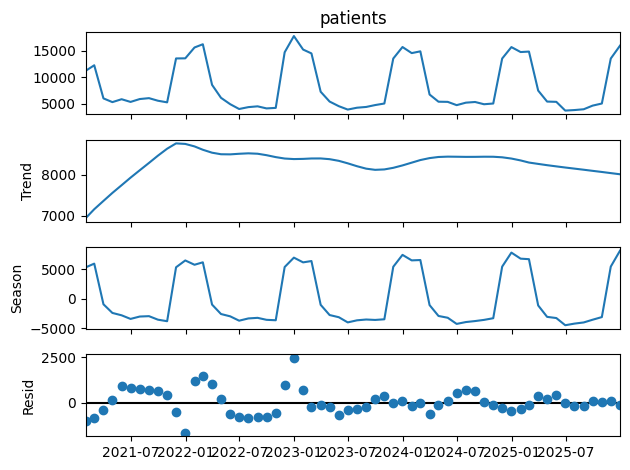

In [11]:
from statsmodels.tsa.seasonal import STL

# Décomposer la série temporelle pour observer la tendance et la saisonnalité
stl = STL(df_monthly_agg, seasonal=13)
result = stl.fit()
result.plot()
plt.show()


les données ne sont pas stationnaires (p-value > 0.05)

In [12]:
df_monthly_agg_diff = df_monthly_agg.diff().dropna()

# Test ADF après différenciation
result_diff = adfuller(df_monthly_agg_diff)
print(f"ADF Statistic après différenciation : {result_diff[0]}")
print(f"P-value après différenciation : {result_diff[1]}")


ADF Statistic après différenciation : -4.100638574172988
P-value après différenciation : 0.0009661732548109273
ADF Statistic après différenciation : -14.934540120389068
P-value après différenciation : 1.3507247836247309e-27


on comprend donc que d doit être égal à 2

# Grid search avec sarima (les données ont l'air d'avoir une saisonalité anuelle)

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# 📌 Fonction pour tester différents paramètres SARIMA
def test_sarima_parameters(df, p_values, d_values, q_values, P_values, D_values, Q_values, m_values):
    results = []  # Liste pour stocker les résultats (modèles, AIC et paramètres)
    
    # Tester différentes combinaisons de (p, d, q) et (P, D, Q) saisonniers
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            for m in m_values:
                                try:
                                    # Créer et ajuster le modèle SARIMA
                                    model = SARIMAX(df, 
                                                    order=(p, d, q), 
                                                    seasonal_order=(P, D, Q, m))
                                    model_fit = model.fit(disp=False)

                                    # Stocker les résultats dans la liste
                                    results.append((model_fit.aic, (p, d, q, P, D, Q, m), model_fit))
                                    print(f'SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {m}) - AIC: {model_fit.aic}')
                                except Exception as e:
                                    print(f"Erreur pour SARIMA({p}, {d}, {q}) x ({P}, {D}, {Q}, {m}): {e}")
    
    # Trier les résultats par AIC croissant
    results.sort(key=lambda x: x[0])  # Tri par AIC (premier élément du tuple)

    # Retourner les 3 meilleurs modèles
    top_3_models = results[:3]
    
    return top_3_models

# Définir les valeurs possibles pour p, d, q, P, D, Q
p_values = range(0, 2)  # Test des valeurs de p de 0 à 2
d_values = [1]  # Test des valeurs de d de 0 à 1
q_values = range(0, 2)  # Test des valeurs de q de 0 à 2

P_values = range(0, 2)  # Test des valeurs de P de 0 à 2
D_values = range(0, 2)  # Test des valeurs de D de 0 à 1
Q_values = range(0, 2)  # Test des valeurs de Q de 0 à 2

m_values = range(2, 13)  # Saison annuelle (12 mois)

# Tester les paramètres SARIMA pour le nombre de lits occupés
top_3_models = test_sarima_parameters(df_monthly_agg, 
                                      p_values, d_values, q_values, 
                                      P_values, D_values, Q_values, 
                                      m_values)

# Afficher les 3 meilleurs modèles trouvés
for i, (aic, order, model) in enumerate(top_3_models, start=1):
    print(f"Top {i} : SARIMA{order} - AIC: {aic}")


SARIMA(0, 1, 0) x (0, 0, 0, 2) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 3) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 4) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 5) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 6) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 7) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 8) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 9) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 10) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 11) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 0, 12) - AIC: 1133.4478457089422
SARIMA(0, 1, 0) x (0, 0, 1, 2) - AIC: 1125.3814851631728
SARIMA(0, 1, 0) x (0, 0, 1, 3) - AIC: 1135.3810130572722
SARIMA(0, 1, 0) x (0, 0, 1, 4) - AIC: 1113.1309815615393
SARIMA(0, 1, 0) x (0, 0, 1, 5) - AIC: 1134.3427220840663
SARIMA(0, 1, 0) x (0, 0, 1, 6) - AIC: 1135.672237726334
SARIMA(0, 1, 0) x (0, 0, 1, 7) - AIC: 1133.364334893082
SARIMA(0, 1, 0) x (0, 0, 1, 8)

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (0, 1, 0, 5) - AIC: 1083.5225091305338
SARIMA(0, 1, 0) x (0, 1, 0, 6) - AIC: 1059.8253094908432
SARIMA(0, 1, 0) x (0, 1, 0, 7) - AIC: 1045.750576262028
SARIMA(0, 1, 0) x (0, 1, 0, 8) - AIC: 1039.41740695391
SARIMA(0, 1, 0) x (0, 1, 0, 9) - AIC: 1001.4434457342761
SARIMA(0, 1, 0) x (0, 1, 0, 10) - AIC: 973.3530028540154
SARIMA(0, 1, 0) x (0, 1, 0, 11) - AIC: 946.3686091218947
SARIMA(0, 1, 0) x (0, 1, 0, 12) - AIC: 797.3892696207682
SARIMA(0, 1, 0) x (0, 1, 1, 2) - AIC: 1100.9184634706728
SARIMA(0, 1, 0) x (0, 1, 1, 3) - AIC: 1076.6176652026636
SARIMA(0, 1, 0) x (0, 1, 1, 4) - AIC: 1071.6625820804898
SARIMA(0, 1, 0) x (0, 1, 1, 5) - AIC: 1053.598465129364
SARIMA(0, 1, 0) x (0, 1, 1, 6) - AIC: 1009.5570237109196
SARIMA(0, 1, 0) x (0, 1, 1, 7) - AIC: 1018.9639621253154
SARIMA(0, 1, 0) x (0, 1, 1, 8) - AIC: 1001.087624590456
SARIMA(0, 1, 0) x (0, 1, 1, 9) - AIC: 972.5467279509069


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (0, 1, 1, 10) - AIC: 965.5245994749001
SARIMA(0, 1, 0) x (0, 1, 1, 11) - AIC: 932.3170173073886
SARIMA(0, 1, 0) x (0, 1, 1, 12) - AIC: 796.1687918997791
SARIMA(0, 1, 0) x (1, 0, 0, 2) - AIC: 1135.1019342948232
SARIMA(0, 1, 0) x (1, 0, 0, 3) - AIC: 1135.3755275521337
SARIMA(0, 1, 0) x (1, 0, 0, 4) - AIC: 1126.525508882262
SARIMA(0, 1, 0) x (1, 0, 0, 5) - AIC: 1133.9892829232576
SARIMA(0, 1, 0) x (1, 0, 0, 6) - AIC: 1135.3301282121101
SARIMA(0, 1, 0) x (1, 0, 0, 7) - AIC: 1134.0221132101606
SARIMA(0, 1, 0) x (1, 0, 0, 8) - AIC: 1121.6311075085098
SARIMA(0, 1, 0) x (1, 0, 0, 9) - AIC: 1135.32934519695
SARIMA(0, 1, 0) x (1, 0, 0, 10) - AIC: 1134.0857669452841
SARIMA(0, 1, 0) x (1, 0, 0, 11) - AIC: 1133.8903999251422
SARIMA(0, 1, 0) x (1, 0, 0, 12) - AIC: 1047.6686709284593
SARIMA(0, 1, 0) x (1, 0, 1, 2) - AIC: 1120.8307670217484
SARIMA(0, 1, 0) x (1, 0, 1, 3) - AIC: 1137.3612821384997
SARIMA(0, 1, 0) x (1, 0, 1, 4) - AIC: 1116.1351388701548
SARIMA(0, 1, 0) x (1, 0, 1, 5) 

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0) x (1, 0, 1, 6) - AIC: 1119.5313193092375
SARIMA(0, 1, 0) x (1, 0, 1, 7) - AIC: 1130.1634494839473
SARIMA(0, 1, 0) x (1, 0, 1, 8) - AIC: 1105.1873321758762
SARIMA(0, 1, 0) x (1, 0, 1, 9) - AIC: 1137.3960476585444
SARIMA(0, 1, 0) x (1, 0, 1, 10) - AIC: 1125.1003522767319
SARIMA(0, 1, 0) x (1, 0, 1, 11) - AIC: 1135.1301997181313
SARIMA(0, 1, 0) x (1, 0, 1, 12) - AIC: 1049.0223825602159
SARIMA(0, 1, 0) x (1, 1, 0, 2) - AIC: 1127.7231262203682
SARIMA(0, 1, 0) x (1, 1, 0, 3) - AIC: 1103.015245903834
SARIMA(0, 1, 0) x (1, 1, 0, 4) - AIC: 1103.2938709101104
SARIMA(0, 1, 0) x (1, 1, 0, 5) - AIC: 1058.7790011824773


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 0) x (1, 1, 0, 6) - AIC: 950.2881676958347
SARIMA(0, 1, 0) x (1, 1, 0, 7) - AIC: 1032.943847742246
SARIMA(0, 1, 0) x (1, 1, 0, 8) - AIC: 1023.6806874659446
SARIMA(0, 1, 0) x (1, 1, 0, 9) - AIC: 989.7398049049787
SARIMA(0, 1, 0) x (1, 1, 0, 10) - AIC: 974.1104160898016
SARIMA(0, 1, 0) x (1, 1, 0, 11) - AIC: 931.2349709460559
SARIMA(0, 1, 0) x (1, 1, 0, 12) - AIC: 798.1281634417525
SARIMA(0, 1, 0) x (1, 1, 1, 2) - AIC: 1102.7892906026636
SARIMA(0, 1, 0) x (1, 1, 1, 3) - AIC: 1077.4498431940951
SARIMA(0, 1, 0) x (1, 1, 1, 4) - AIC: 1069.118261713444
SARIMA(0, 1, 0) x (1, 1, 1, 5) - AIC: 1054.9740504034949
SARIMA(0, 1, 0) x (1, 1, 1, 6) - AIC: 951.4116832488464
SARIMA(0, 1, 0) x (1, 1, 1, 7) - AIC: 1020.8475984237697
SARIMA(0, 1, 0) x (1, 1, 1, 8) - AIC: 996.1383519367407
SARIMA(0, 1, 0) x (1, 1, 1, 9) - AIC: 973.3801773231783
SARIMA(0, 1, 0) x (1, 1, 1, 10) - AIC: 964.7578657935909


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 0) x (1, 1, 1, 11) - AIC: 934.1161162423446
SARIMA(0, 1, 0) x (1, 1, 1, 12) - AIC: 800.7904682809535
SARIMA(0, 1, 1) x (0, 0, 0, 2) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 3) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 4) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 5) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 6) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 7) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 8) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 9) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 10) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 11) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 0, 12) - AIC: 1132.493699878571
SARIMA(0, 1, 1) x (0, 0, 1, 2) - AIC: 1126.0994588977792
SARIMA(0, 1, 1) x (0, 0, 1, 3) - AIC: 1134.312791148657
SARIMA(0, 1, 1) x (0, 0, 1, 4) - AIC: 1113.0807547791783
SARIMA(0, 1, 1) x (0, 0, 1, 5) - AIC: 1134.2688368067386
SARIMA(0, 1, 1) x (0, 0, 1, 6) - AIC: 11

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (0, 1, 0, 6) - AIC: 1057.91253383441
SARIMA(0, 1, 1) x (0, 1, 0, 7) - AIC: 1033.2234084889224
SARIMA(0, 1, 1) x (0, 1, 0, 8) - AIC: 1038.6432252995419
SARIMA(0, 1, 1) x (0, 1, 0, 9) - AIC: 996.9401178766974
SARIMA(0, 1, 1) x (0, 1, 0, 10) - AIC: 969.3185946243713
SARIMA(0, 1, 1) x (0, 1, 0, 11) - AIC: 936.3661964133025
SARIMA(0, 1, 1) x (0, 1, 0, 12) - AIC: 798.1434437150696
SARIMA(0, 1, 1) x (0, 1, 1, 2) - AIC: 1100.1631598597994
SARIMA(0, 1, 1) x (0, 1, 1, 3) - AIC: 1073.8196018324115
SARIMA(0, 1, 1) x (0, 1, 1, 4) - AIC: 1070.8867120355146
SARIMA(0, 1, 1) x (0, 1, 1, 5) - AIC: 1051.8031282605662
SARIMA(0, 1, 1) x (0, 1, 1, 6) - AIC: 1008.3333233150099
SARIMA(0, 1, 1) x (0, 1, 1, 7) - AIC: 1018.2219345960124
SARIMA(0, 1, 1) x (0, 1, 1, 8) - AIC: 1000.6251615372498
SARIMA(0, 1, 1) x (0, 1, 1, 9) - AIC: 969.5715853565173
SARIMA(0, 1, 1) x (0, 1, 1, 10) - AIC: 965.0814633920816


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (0, 1, 1, 11) - AIC: 934.9661183478897
SARIMA(0, 1, 1) x (0, 1, 1, 12) - AIC: 797.1850367963157
SARIMA(0, 1, 1) x (1, 0, 0, 2) - AIC: 1134.0854316042671
SARIMA(0, 1, 1) x (1, 0, 0, 3) - AIC: 1134.327130664687
SARIMA(0, 1, 1) x (1, 0, 0, 4) - AIC: 1126.6174773722958
SARIMA(0, 1, 1) x (1, 0, 0, 5) - AIC: 1134.1896448051612
SARIMA(0, 1, 1) x (1, 0, 0, 6) - AIC: 1134.4362828390654
SARIMA(0, 1, 1) x (1, 0, 0, 7) - AIC: 1134.3443693875022


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 0, 0, 8) - AIC: 1123.0924517667208
SARIMA(0, 1, 1) x (1, 0, 0, 9) - AIC: 1134.4616859751093
SARIMA(0, 1, 1) x (1, 0, 0, 10) - AIC: 1133.188330666941
SARIMA(0, 1, 1) x (1, 0, 0, 11) - AIC: 1134.2224577303712
SARIMA(0, 1, 1) x (1, 0, 0, 12) - AIC: 1048.17832949073
SARIMA(0, 1, 1) x (1, 0, 1, 2) - AIC: 1121.3802192114852
SARIMA(0, 1, 1) x (1, 0, 1, 3) - AIC: 1136.3045937042461
SARIMA(0, 1, 1) x (1, 0, 1, 4) - AIC: 1114.5316707407924
SARIMA(0, 1, 1) x (1, 0, 1, 5) - AIC: 1135.915638627563
SARIMA(0, 1, 1) x (1, 0, 1, 6) - AIC: 1119.3089391067385


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1) x (1, 0, 1, 7) - AIC: 1131.7579520543318
SARIMA(0, 1, 1) x (1, 0, 1, 8) - AIC: 1105.7837944418845
SARIMA(0, 1, 1) x (1, 0, 1, 9) - AIC: 1136.447741799841
SARIMA(0, 1, 1) x (1, 0, 1, 10) - AIC: 1124.262171944418
SARIMA(0, 1, 1) x (1, 0, 1, 11) - AIC: 1136.293340469911


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 0, 1, 12) - AIC: 1048.5078032555668
SARIMA(0, 1, 1) x (1, 1, 0, 2) - AIC: 1127.8789721216588
SARIMA(0, 1, 1) x (1, 1, 0, 3) - AIC: 1099.7658599886386
SARIMA(0, 1, 1) x (1, 1, 0, 4) - AIC: 1104.2108007783297
SARIMA(0, 1, 1) x (1, 1, 0, 5) - AIC: 1053.0953225101048


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1) x (1, 1, 0, 6) - AIC: 953.6300168699827
SARIMA(0, 1, 1) x (1, 1, 0, 7) - AIC: 1029.6812832263672
SARIMA(0, 1, 1) x (1, 1, 0, 8) - AIC: 1025.378520476941
SARIMA(0, 1, 1) x (1, 1, 0, 9) - AIC: 988.7699724898115
SARIMA(0, 1, 1) x (1, 1, 0, 10) - AIC: 971.2716706557103
SARIMA(0, 1, 1) x (1, 1, 0, 11) - AIC: 933.7564768426739
SARIMA(0, 1, 1) x (1, 1, 0, 12) - AIC: 798.9350583681749
SARIMA(0, 1, 1) x (1, 1, 1, 2) - AIC: 1102.0977750825282
SARIMA(0, 1, 1) x (1, 1, 1, 3) - AIC: 1075.4615022403732
SARIMA(0, 1, 1) x (1, 1, 1, 4) - AIC: 1068.3751830433873


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1) x (1, 1, 1, 5) - AIC: 1052.4950357459456
SARIMA(0, 1, 1) x (1, 1, 1, 6) - AIC: 955.2720204477023
SARIMA(0, 1, 1) x (1, 1, 1, 7) - AIC: 1019.8515689855853
SARIMA(0, 1, 1) x (1, 1, 1, 8) - AIC: 996.0530116954598


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(0, 1, 1) x (1, 1, 1, 9) - AIC: 970.8577709957708
SARIMA(0, 1, 1) x (1, 1, 1, 10) - AIC: 966.803600151056
SARIMA(0, 1, 1) x (1, 1, 1, 11) - AIC: 933.7935000644947
SARIMA(0, 1, 1) x (1, 1, 1, 12) - AIC: 791.5879876692594
SARIMA(1, 1, 0) x (0, 0, 0, 2) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 3) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 4) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 5) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 6) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 7) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 8) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 9) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 10) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 11) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 0, 12) - AIC: 1133.0724590211637
SARIMA(1, 1, 0) x (0, 0, 1, 2) - AIC: 1126.5527939762703
SARIMA(1, 1, 0) x (0, 0, 1, 3) - AIC: 1134.99384209395
SARIMA(1, 1, 0) x (0, 0, 1, 4) -

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (0, 0, 1, 12) - AIC: 1085.4795378072413
SARIMA(1, 1, 0) x (0, 1, 0, 2) - AIC: 1132.2424094923683
SARIMA(1, 1, 0) x (0, 1, 0, 3) - AIC: 1107.4773927831948
SARIMA(1, 1, 0) x (0, 1, 0, 4) - AIC: 1112.8941428990913
SARIMA(1, 1, 0) x (0, 1, 0, 5) - AIC: 1077.5099521623706
SARIMA(1, 1, 0) x (0, 1, 0, 6) - AIC: 1055.1378275111924
SARIMA(1, 1, 0) x (0, 1, 0, 7) - AIC: 1038.1171025636072
SARIMA(1, 1, 0) x (0, 1, 0, 8) - AIC: 1039.1737561323607
SARIMA(1, 1, 0) x (0, 1, 0, 9) - AIC: 997.1731219103564
SARIMA(1, 1, 0) x (0, 1, 0, 10) - AIC: 974.3816972470548
SARIMA(1, 1, 0) x (0, 1, 0, 11) - AIC: 942.1865256877875
SARIMA(1, 1, 0) x (0, 1, 0, 12) - AIC: 798.5582320609722
SARIMA(1, 1, 0) x (0, 1, 1, 2) - AIC: 1100.1035882250787
SARIMA(1, 1, 0) x (0, 1, 1, 3) - AIC: 1073.1805730714725
SARIMA(1, 1, 0) x (0, 1, 1, 4) - AIC: 1071.5031638937778
SARIMA(1, 1, 0) x (0, 1, 1, 5) - AIC: 1052.6573139066018
SARIMA(1, 1, 0) x (0, 1, 1, 6) - AIC: 1006.6816023968616
SARIMA(1, 1, 0) x (0, 1, 1, 7) 

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (0, 1, 1, 10) - AIC: 965.4040925839978
SARIMA(1, 1, 0) x (0, 1, 1, 11) - AIC: 934.3087891932729


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (0, 1, 1, 12) - AIC: 797.7252521590208
SARIMA(1, 1, 0) x (1, 0, 0, 2) - AIC: 1134.3482191758658
SARIMA(1, 1, 0) x (1, 0, 0, 3) - AIC: 1134.9932960636936
SARIMA(1, 1, 0) x (1, 0, 0, 4) - AIC: 1127.2827036940978
SARIMA(1, 1, 0) x (1, 0, 0, 5) - AIC: 1134.5907780419434
SARIMA(1, 1, 0) x (1, 0, 0, 6) - AIC: 1135.0724550315692
SARIMA(1, 1, 0) x (1, 0, 0, 7) - AIC: 1134.7561275336293
SARIMA(1, 1, 0) x (1, 0, 0, 8) - AIC: 1123.4747641759095
SARIMA(1, 1, 0) x (1, 0, 0, 9) - AIC: 1135.0648052947804
SARIMA(1, 1, 0) x (1, 0, 0, 10) - AIC: 1134.0660881285246
SARIMA(1, 1, 0) x (1, 0, 0, 11) - AIC: 1135.0611600160976
SARIMA(1, 1, 0) x (1, 0, 0, 12) - AIC: 1048.549780053315
SARIMA(1, 1, 0) x (1, 0, 1, 2) - AIC: 1121.069902909961
SARIMA(1, 1, 0) x (1, 0, 1, 3) - AIC: 1136.993395779183
SARIMA(1, 1, 0) x (1, 0, 1, 4) - AIC: 1115.2204697264524
SARIMA(1, 1, 0) x (1, 0, 1, 5) - AIC: 1136.31956541692
SARIMA(1, 1, 0) x (1, 0, 1, 6) - AIC: 1120.9181097403366


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0) x (1, 0, 1, 7) - AIC: 1131.8102165224525
SARIMA(1, 1, 0) x (1, 0, 1, 8) - AIC: 1106.1357292507719
SARIMA(1, 1, 0) x (1, 0, 1, 9) - AIC: 1137.0648850550836
SARIMA(1, 1, 0) x (1, 0, 1, 10) - AIC: 1125.3503638858754
SARIMA(1, 1, 0) x (1, 0, 1, 11) - AIC: 1136.595804775979


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 0) x (1, 0, 1, 12) - AIC: 1048.943572189697
SARIMA(1, 1, 0) x (1, 1, 0, 2) - AIC: 1128.4609484388177
SARIMA(1, 1, 0) x (1, 1, 0, 3) - AIC: 1098.9812443143398
SARIMA(1, 1, 0) x (1, 1, 0, 4) - AIC: 1104.2094108373856
SARIMA(1, 1, 0) x (1, 1, 0, 5) - AIC: 1062.0144406315462
SARIMA(1, 1, 0) x (1, 1, 0, 6) - AIC: 954.2712020590925
SARIMA(1, 1, 0) x (1, 1, 0, 7) - AIC: 1032.3926946341303


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 0) x (1, 1, 0, 8) - AIC: 1026.3554379412317
SARIMA(1, 1, 0) x (1, 1, 0, 9) - AIC: 986.3712990938901
SARIMA(1, 1, 0) x (1, 1, 0, 10) - AIC: 974.9475032234466
SARIMA(1, 1, 0) x (1, 1, 0, 11) - AIC: 934.4516766873376
SARIMA(1, 1, 0) x (1, 1, 0, 12) - AIC: 799.4103839386482
SARIMA(1, 1, 0) x (1, 1, 1, 2) - AIC: 1102.101032905219
SARIMA(1, 1, 0) x (1, 1, 1, 3) - AIC: 1074.7310703363669
SARIMA(1, 1, 0) x (1, 1, 1, 4) - AIC: 1069.2738268523149
SARIMA(1, 1, 0) x (1, 1, 1, 5) - AIC: 1054.3917882849662
SARIMA(1, 1, 0) x (1, 1, 1, 6) - AIC: 953.0175670923959
SARIMA(1, 1, 0) x (1, 1, 1, 7) - AIC: 1020.4207297525646
SARIMA(1, 1, 0) x (1, 1, 1, 8) - AIC: 996.2900587594224
SARIMA(1, 1, 0) x (1, 1, 1, 9) - AIC: 969.8718348536825


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
 

SARIMA(1, 1, 0) x (1, 1, 1, 10) - AIC: 965.1758552166102
SARIMA(1, 1, 0) x (1, 1, 1, 11) - AIC: 936.1517632321618
SARIMA(1, 1, 0) x (1, 1, 1, 12) - AIC: 791.8822478801437
SARIMA(1, 1, 1) x (0, 0, 0, 2) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 3) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 4) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 5) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 6) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 7) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 8) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 9) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 10) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 11) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 0, 12) - AIC: 1128.134280048545
SARIMA(1, 1, 1) x (0, 0, 1, 2) - AIC: 1127.5342374975937
SARIMA(1, 1, 1) x (0, 0, 1, 3) - AIC: 1130.31723850159
SARIMA(1, 1, 1) x (0, 0, 1, 4) - AIC: 1113.5675515267988
SARIMA(1, 1, 1) x (0, 0, 1, 5) - AIC: 113

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (0, 0, 1, 9) - AIC: 1130.5278897556818
SARIMA(1, 1, 1) x (0, 0, 1, 10) - AIC: 1120.6005171279267
SARIMA(1, 1, 1) x (0, 0, 1, 11) - AIC: 1130.6220319143904
SARIMA(1, 1, 1) x (0, 0, 1, 12) - AIC: 1086.1223318000873


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 1, 0, 2) - AIC: 1116.8999478962699
SARIMA(1, 1, 1) x (0, 1, 0, 3) - AIC: 1108.5609332284773
SARIMA(1, 1, 1) x (0, 1, 0, 4) - AIC: 1103.4946276631033
SARIMA(1, 1, 1) x (0, 1, 0, 5) - AIC: 1073.1373814822734
SARIMA(1, 1, 1) x (0, 1, 0, 6) - AIC: 1055.3882257473956
SARIMA(1, 1, 1) x (0, 1, 0, 7) - AIC: 1034.5451598814047
SARIMA(1, 1, 1) x (0, 1, 0, 8) - AIC: 1030.514721263322
SARIMA(1, 1, 1) x (0, 1, 0, 9) - AIC: 998.510274533122
SARIMA(1, 1, 1) x (0, 1, 0, 10) - AIC: 965.1514080748664
SARIMA(1, 1, 1) x (0, 1, 0, 11) - AIC: 935.9911218214529
SARIMA(1, 1, 1) x (0, 1, 0, 12) - AIC: 799.3205022125464
SARIMA(1, 1, 1) x (0, 1, 1, 2) - AIC: 1098.7834196203887


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (0, 1, 1, 3) - AIC: 1075.179617894893
SARIMA(1, 1, 1) x (0, 1, 1, 4) - AIC: 1068.9442104961179
SARIMA(1, 1, 1) x (0, 1, 1, 5) - AIC: 1049.3010771721335
SARIMA(1, 1, 1) x (0, 1, 1, 6) - AIC: 1007.5758142589135
SARIMA(1, 1, 1) x (0, 1, 1, 7) - AIC: 1015.8247145563929


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (0, 1, 1, 8) - AIC: 998.7685376311327
SARIMA(1, 1, 1) x (0, 1, 1, 9) - AIC: 970.732698985308


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 1, 1, 10) - AIC: 962.6078471940355
SARIMA(1, 1, 1) x (0, 1, 1, 11) - AIC: 930.7686616484142


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (0, 1, 1, 12) - AIC: 797.6051161707866
SARIMA(1, 1, 1) x (1, 0, 0, 2) - AIC: 1130.637729322081
SARIMA(1, 1, 1) x (1, 0, 0, 3) - AIC: 1130.3555392343458
SARIMA(1, 1, 1) x (1, 0, 0, 4) - AIC: 1123.9201146763683
SARIMA(1, 1, 1) x (1, 0, 0, 5) - AIC: 1129.8599448309924
SARIMA(1, 1, 1) x (1, 0, 0, 6) - AIC: 1129.9139796175925
SARIMA(1, 1, 1) x (1, 0, 0, 7) - AIC: 1130.132668371669
SARIMA(1, 1, 1) x (1, 0, 0, 8) - AIC: 1119.3597151188821
SARIMA(1, 1, 1) x (1, 0, 0, 9) - AIC: 1130.5496844678853
SARIMA(1, 1, 1) x (1, 0, 0, 10) - AIC: 1127.6095683562812
SARIMA(1, 1, 1) x (1, 0, 0, 11) - AIC: 1130.5956437253526
SARIMA(1, 1, 1) x (1, 0, 0, 12) - AIC: 1050.0593060462256
SARIMA(1, 1, 1) x (1, 0, 1, 2) - AIC: 1122.7877117927019
SARIMA(1, 1, 1) x (1, 0, 1, 3) - AIC: 1132.3007409766667
SARIMA(1, 1, 1) x (1, 0, 1, 4) - AIC: 1115.1943357531698
SARIMA(1, 1, 1) x (1, 0, 1, 5) - AIC: 1130.4736744570457


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 6) - AIC: 1114.1851965535277
SARIMA(1, 1, 1) x (1, 0, 1, 7) - AIC: 1127.3541761700353
SARIMA(1, 1, 1) x (1, 0, 1, 8) - AIC: 1105.7872142168305


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 9) - AIC: 1130.8764455316252


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (1, 0, 1, 10) - AIC: 1118.1741719995175
SARIMA(1, 1, 1) x (1, 0, 1, 11) - AIC: 1132.0716432624201


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 0, 1, 12) - AIC: 1051.6500309000398
SARIMA(1, 1, 1) x (1, 1, 0, 2) - AIC: 1116.2045870369102
SARIMA(1, 1, 1) x (1, 1, 0, 3) - AIC: 1101.0001274696792
SARIMA(1, 1, 1) x (1, 1, 0, 4) - AIC: 1094.2170976298553
SARIMA(1, 1, 1) x (1, 1, 0, 5) - AIC: 1049.5058285051796


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1) x (1, 1, 0, 6) - AIC: 951.8225993673128
SARIMA(1, 1, 1) x (1, 1, 0, 7) - AIC: 1028.4909915953692
SARIMA(1, 1, 1) x (1, 1, 0, 8) - AIC: 1027.39173557711
SARIMA(1, 1, 1) x (1, 1, 0, 9) - AIC: 988.5851066276549
SARIMA(1, 1, 1) x (1, 1, 0, 10) - AIC: 966.130078700349
SARIMA(1, 1, 1) x (1, 1, 0, 11) - AIC: 929.5773756244621
SARIMA(1, 1, 1) x (1, 1, 0, 12) - AIC: 799.7935714170568
SARIMA(1, 1, 1) x (1, 1, 1, 2) - AIC: 1099.9782371791866
SARIMA(1, 1, 1) x (1, 1, 1, 3) - AIC: 1076.666327352857


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 4) - AIC: 1067.1144750280944
SARIMA(1, 1, 1) x (1, 1, 1, 5) - AIC: 1048.6438353278027


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 6) - AIC: 956.6483665381758
SARIMA(1, 1, 1) x (1, 1, 1, 7) - AIC: 1017.8129788365204


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 8) - AIC: 995.114371572842


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1) x (1, 1, 1, 9) - AIC: 971.8462244536472
SARIMA(1, 1, 1) x (1, 1, 1, 10) - AIC: 960.1235073882849


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA(1, 1, 1) x (1, 1, 1, 11) - AIC: 931.5877257853016
SARIMA(1, 1, 1) x (1, 1, 1, 12) - AIC: 792.2935566559138
Top 1 : SARIMA(0, 1, 1, 1, 1, 1, 12) - AIC: 791.5879876692594
Top 2 : SARIMA(1, 1, 0, 1, 1, 1, 12) - AIC: 791.8822478801437
Top 3 : SARIMA(1, 1, 1, 1, 1, 1, 12) - AIC: 792.2935566559138


les AIC sont très hauts, on essaye avec un simple modèle ARIMA

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# 📌 Fonction pour tester différents paramètres SARIMA
def test_sarima_parameters(df, p_values, d_values, q_values):
    results = []  # Liste pour stocker les résultats (modèles, AIC et paramètres)
    
    # Tester différentes combinaisons de (p, d, q) et (P, D, Q) saisonniers
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Créer et ajuster le modèle SARIMA
                    model = SARIMAX(df, 
                        order=(p, d, q))
                    model_fit = model.fit(disp=False)

                    # Stocker les résultats dans la liste
                    results.append((model_fit.aic, (p, d, q), model_fit))
                    print(f'SARIMA({p}, {d}, {q}) - AIC: {model_fit.aic}')
                except Exception as e:
                    print(f"Erreur pour SARIMA({p}, {d}, {q}) : {e}")
    
    # Trier les résultats par AIC croissant
    results.sort(key=lambda x: x[0])  # Tri par AIC (premier élément du tuple)

    # Retourner les 3 meilleurs modèles
    top_3_models = results[:3]
    
    return top_3_models

# Définir les valeurs possibles pour p, d, q, P, D, Q
p_values = range(0, 10)  # Test des valeurs de p de 0 à 2
d_values = [1]  # Test des valeurs de d de 0 à 1
q_values = range(0, 10)  # Test des valeurs de q de 0 à 2

# Tester les paramètres SARIMA pour le nombre de lits occupés
top_3_models = test_sarima_parameters(df_monthly_agg, 
                                      p_values, d_values, q_values)

# Afficher les 3 meilleurs modèles trouvés
for i, (aic, order, model) in enumerate(top_3_models, start=1):
    print(f"Top {i} : SARIMA{order} - AIC: {aic}")


SARIMA(0, 1, 0) - AIC: 1133.4478457089422
SARIMA(0, 1, 1) - AIC: 1132.493699878571
SARIMA(0, 1, 2) - AIC: 1126.2425738824904
SARIMA(0, 1, 3) - AIC: 1132.4422862426377
SARIMA(0, 1, 4) - AIC: 1114.4553620283139


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 5) - AIC: 1116.7307823948274
SARIMA(0, 1, 6) - AIC: 1116.6081916391684


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

SARIMA(0, 1, 7) - AIC: 1112.2812695605803
SARIMA(0, 1, 8) - AIC: 1126.2396341296437


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(0, 1, 9) - AIC: 1120.5145807367571
SARIMA(1, 1, 0) - AIC: 1133.0724590211637
SARIMA(1, 1, 1) - AIC: 1128.134280048545
SARIMA(1, 1, 2) - AIC: 1124.1913523202102
SARIMA(1, 1, 3) - AIC: 1127.63297901371
SARIMA(1, 1, 4) - AIC: 1116.0186795874733
SARIMA(1, 1, 5) - AIC: 1119.0647633155374


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Ma

SARIMA(1, 1, 6) - AIC: 1122.3037430897534


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 7) - AIC: 1122.805146339433


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(1, 1, 8) - AIC: 1127.532243741983


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 9) - AIC: 1117.580221100459
SARIMA(2, 1, 0) - AIC: 1134.2698987901474
SARIMA(2, 1, 1) - AIC: 1123.7694073044536
SARIMA(2, 1, 2) - AIC: 1123.1155127276586


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(2, 1, 3) - AIC: 1124.527763646235
SARIMA(2, 1, 4) - AIC: 1119.393220380474


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-

SARIMA(2, 1, 5) - AIC: 1120.2711308823407
SARIMA(2, 1, 6) - AIC: 1122.0550518208934


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(2, 1, 7) - AIC: 1122.3736681879336


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(2, 1, 8) - AIC: 1128.7365355683435


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 9) - AIC: 1116.2995779538965
SARIMA(3, 1, 0) - AIC: 1136.255698005719
SARIMA(3, 1, 1) - AIC: 1132.3792484340763


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 2) - AIC: 1123.0598154065176
SARIMA(3, 1, 3) - AIC: 1111.006329973081


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-

SARIMA(3, 1, 4) - AIC: 1118.582359083823
SARIMA(3, 1, 5) - AIC: 1121.9409497784961


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 6) - AIC: 1123.6644752928016


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 7) - AIC: 1123.2553141911642


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(3, 1, 8) - AIC: 1130.444322496994


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 9) - AIC: 1117.9032198202985
SARIMA(4, 1, 0) - AIC: 1128.7785338015965
SARIMA(4, 1, 1) - AIC: 1130.7730590513406
SARIMA(4, 1, 2) - AIC: 1116.68241097904


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 3) - AIC: 1113.8447289205865
SARIMA(4, 1, 4) - AIC: 1119.8519035631466


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 5) - AIC: 1115.3051443442466


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 6) - AIC: 1113.3507224647963


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 7) - AIC: 1119.3840014316127


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(4, 1, 8) - AIC: 1118.933433858192


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(4, 1, 9) - AIC: 1111.5350204282688
SARIMA(5, 1, 0) - AIC: 1130.7733217042764
SARIMA(5, 1, 1) - AIC: 1129.9892621367837


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 2) - AIC: 1118.0730044449117
SARIMA(5, 1, 3) - AIC: 1113.8725405810144


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 4) - AIC: 1116.737143465513


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 5) - AIC: 1116.1950449488008


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 6) - AIC: 1117.0389485277933


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 7) - AIC: 1118.9657702424845


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(5, 1, 8) - AIC: 1117.7269007343273


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(5, 1, 9) - AIC: 1110.538970686961
SARIMA(6, 1, 0) - AIC: 1132.227113436908


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 1) - AIC: 1115.8521500637487
SARIMA(6, 1, 2) - AIC: 1123.0144930522897


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 3) - AIC: 1133.3097282690662


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 4) - AIC: 1118.0545942124684


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 5) - AIC: 1117.9451128830246


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 6) - AIC: 1115.4631009636794


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 7) - AIC: 1119.5351301607084


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(6, 1, 8) - AIC: 1118.665920697208


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(6, 1, 9) - AIC: 1112.972561513456
SARIMA(7, 1, 0) - AIC: 1132.5463337933654
SARIMA(7, 1, 1) - AIC: 1117.2585500592568


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 2) - AIC: 1118.5608047949604


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 3) - AIC: 1114.36773066347


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 4) - AIC: 1106.840768357984


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 5) - AIC: 1107.5690481775498


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 6) - AIC: 1111.778569375634


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(7, 1, 7) - AIC: 1112.94301149636


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(7, 1, 8) - AIC: 1113.3134143615987


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(7, 1, 9) - AIC: 1104.7284031812383
SARIMA(8, 1, 0) - AIC: 1079.8087436672783
SARIMA(8, 1, 1) - AIC: 1079.4385908201666
SARIMA(8, 1, 2) - AIC: 1079.9485781276348


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 3) - AIC: 1068.330820165016


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

SARIMA(8, 1, 4) - AIC: 1088.7344630693021


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 5) - AIC: 1082.9943673306238


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 6) - AIC: 1059.0868669545212


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 7) - AIC: 1058.7037341685518


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(8, 1, 8) - AIC: 1061.2685909829393


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(8, 1, 9) - AIC: 1100.6244798134373
SARIMA(9, 1, 0) - AIC: 1081.1549225879473
SARIMA(9, 1, 1) - AIC: 1081.1629488663123


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(9, 1, 2) - AIC: 1081.8887648434356


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(9, 1, 3) - AIC: 1067.9968277698638


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 4) - AIC: 1089.92341176652


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 5) - AIC: 1077.5144929897558


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 6) - AIC: 1060.2840793884247


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 7) - AIC: 1060.3533598225094


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA(9, 1, 8) - AIC: 1063.6103705186279
SARIMA(9, 1, 9) - AIC: 1097.7596175549104
Top 1 : SARIMA(8, 1, 7) - AIC: 1058.7037341685518
Top 2 : SARIMA(8, 1, 6) - AIC: 1059.0868669545212
Top 3 : SARIMA(9, 1, 6) - AIC: 1060.2840793884247


/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


première visualisation du modèle avec le meilleur aic

/home/mona/.pyenv/versions/3.12.7/envs/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


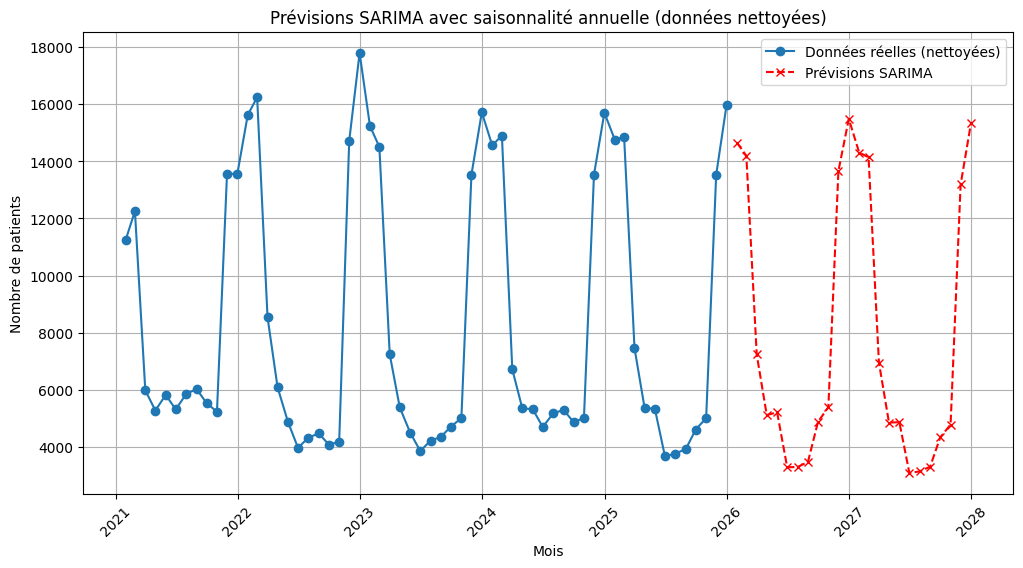

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Créer le modèle SARIMA
best_model = SARIMAX(df_monthly_agg, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))

# Ajuster le modèle
model_fit = best_model.fit(disp=False)

# Nombre de mois à prédire
forecast_steps = 24

# Générer les prévisions
forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

# Créer l'index de prévision
forecast_index = pd.date_range(start=df_monthly_agg.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_agg, label="Données réelles (nettoyées)", marker='o')
plt.plot(forecast_index, forecast, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
plt.title("Prévisions SARIMA avec saisonnalité annuelle (données nettoyées)")
plt.xlabel("Mois")
plt.ylabel("Nombre de patients")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


les prédictions décroient, sûrement à cause des très gros pics alant de 50 000 à 200 000 2 fois par an

In [19]:

# Afficher le résumé du modèle
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                           patients   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -391.794
Date:                            Mon, 03 Mar 2025   AIC                            791.588
Time:                                    22:07:24   BIC                            798.989
Sample:                                01-31-2021   HQIC                           794.373
                                     - 12-31-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1375      0.208      0.662      0.508      -0.269       0.544
ar.S.L12      -0.5325      0.181   

Prévisions SARIMA (10 premières valeurs) :
 2026-01-31    14643.523156
2026-02-28    14190.517539
2026-03-31     7240.278420
2026-04-30     5119.518905
2026-05-31     5210.347995
2026-06-30     3293.209442
2026-07-31     3299.113605
2026-08-31     3478.189952
2026-09-30     4878.425272
2026-10-31     5396.016786
Freq: ME, Name: predicted_mean, dtype: float64


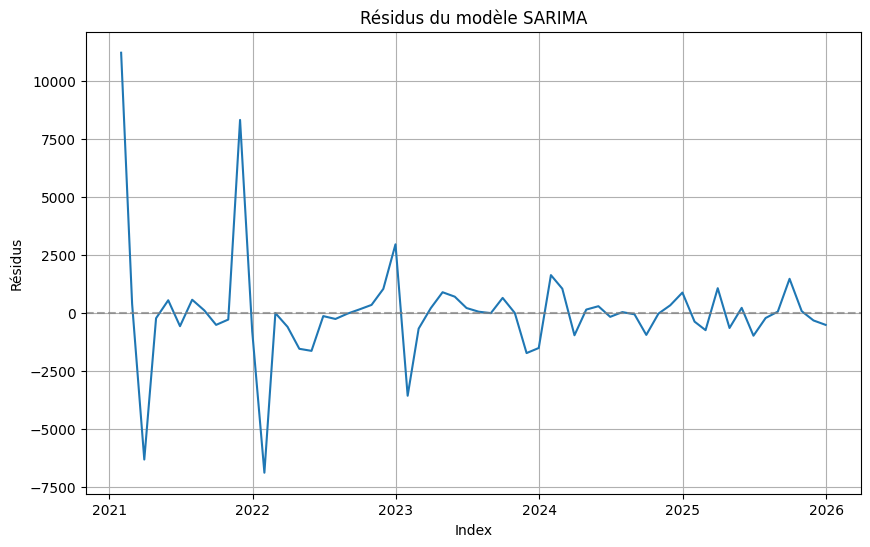

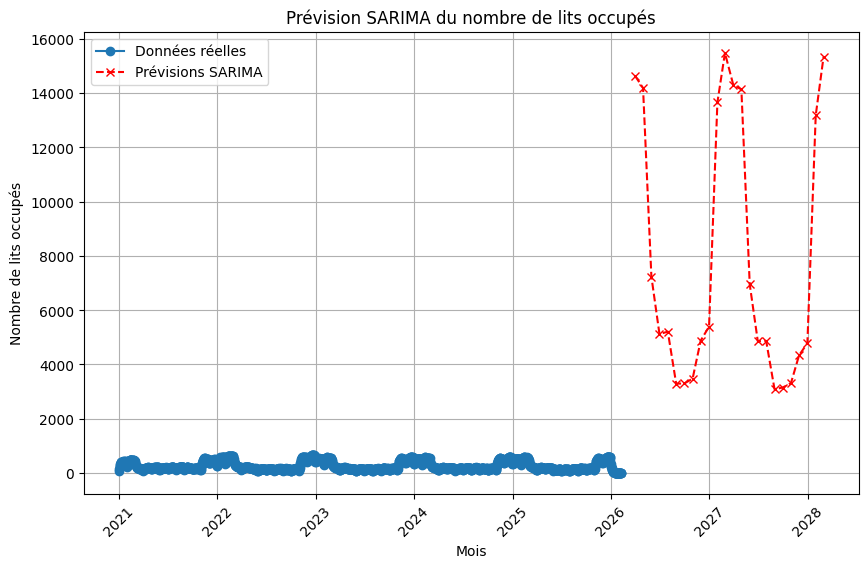

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nombre de mois à prédire
forecast_steps = 24  # 12 mois

# Vérifier si le modèle a été ajusté correctement
if model_fit is not None:
    # Générer les prévisions avec le meilleur modèle
    forecast = model_fit.get_forecast(steps=forecast_steps).predicted_mean

    # Vérifier les prévisions pour détecter des anomalies
    print("Prévisions SARIMA (10 premières valeurs) :\n", forecast[:10])

    # Vérification des résidus
    if hasattr(model_fit, "resid"):
        residuals = model_fit.resid
        plt.figure(figsize=(10, 6))
        plt.plot(residuals)
        plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
        plt.title("Résidus du modèle SARIMA")
        plt.xlabel("Index")
        plt.ylabel("Résidus")
        plt.grid(True)
        plt.show()
    else:
        print("Aucun résidu disponible.")

    # Création de l'index de prévision pour les prochains mois
    forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

    # Visualisation des prévisions
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly.index, df_monthly['patients'], label="Données réelles", marker='o')
    plt.plot(forecast_index, forecast, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
    plt.title("Prévision SARIMA du nombre de lits occupés")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de lits occupés")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Le modèle n'a pas été ajusté correctement.")


Prévisions SARIMA (10 premières valeurs) :
 2026-01-31    14643.523156
2026-02-28    14190.517539
2026-03-31     7240.278420
2026-04-30     5119.518905
2026-05-31     5210.347995
2026-06-30     3293.209442
2026-07-31     3299.113605
2026-08-31     3478.189952
2026-09-30     4878.425272
2026-10-31     5396.016786
Freq: ME, Name: predicted_mean, dtype: float64


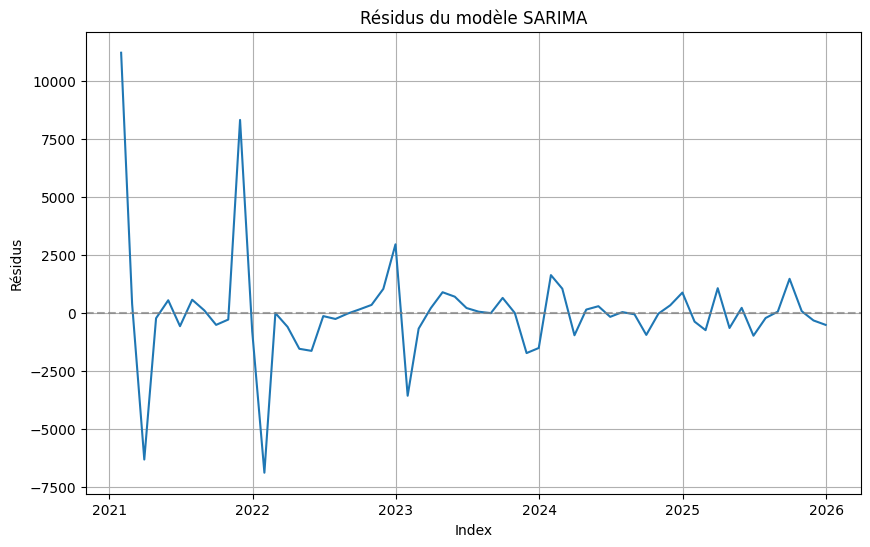

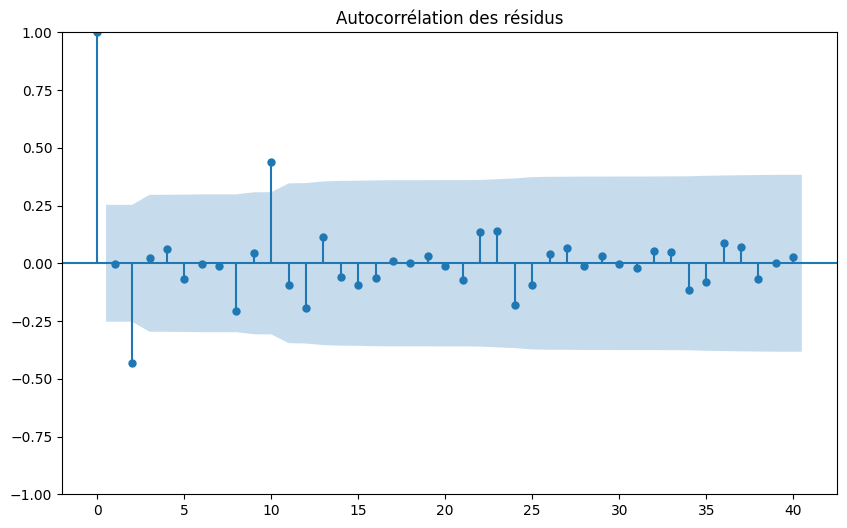

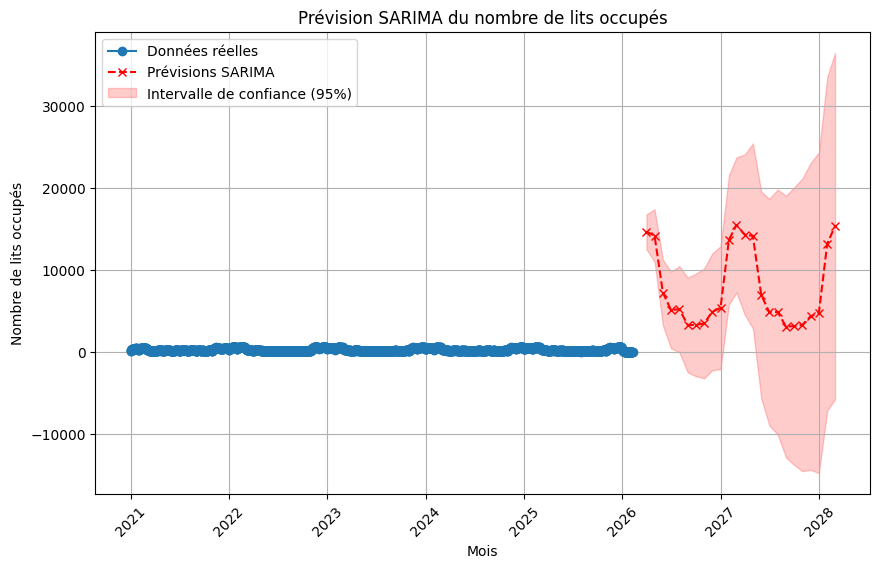

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Nombre de mois à prédire
forecast_steps = 24  # 12 mois

# Vérifier si le modèle a été ajusté correctement
if model_fit is not None and hasattr(model_fit, 'aic'):
    # Générer les prévisions avec le meilleur modèle
    forecast_mean = model_fit.get_forecast(steps=forecast_steps).predicted_mean
    forecast_conf_int = model_fit.get_forecast(steps=forecast_steps).conf_int()

    # Vérifier les prévisions pour détecter des anomalies
    print("Prévisions SARIMA (10 premières valeurs) :\n", forecast_mean[:10])

    # Vérification des résidus
    if hasattr(model_fit, "resid"):
        residuals = model_fit.resid
        plt.figure(figsize=(10, 6))
        plt.plot(residuals)
        plt.axhline(0, linestyle='--', color='gray', alpha=0.7)
        plt.title("Résidus du modèle SARIMA")
        plt.xlabel("Index")
        plt.ylabel("Résidus")
        plt.grid(True)
        plt.show()

        # Autocorrélation des résidus
        plt.figure(figsize=(10, 6))
        plot_acf(residuals, lags=40, ax=plt.gca())
        plt.title("Autocorrélation des résidus")
        plt.show()

    else:
        print("Aucun résidu disponible.")

    # Création de l'index de prévision pour les prochains mois
    forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='ME')[1:]

    # Visualisation des prévisions avec intervalles de confiance
    plt.figure(figsize=(10, 6))
    plt.plot(df_monthly.index, df_monthly['patients'], label="Données réelles", marker='o')
    plt.plot(forecast_index, forecast_mean, label="Prévisions SARIMA", color='red', linestyle='dashed', marker='x')
    plt.fill_between(forecast_index, 
                     forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], 
                     color='red', alpha=0.2, label="Intervalle de confiance (95%)")
    plt.title("Prévision SARIMA du nombre de lits occupés")
    plt.xlabel("Mois")
    plt.ylabel("Nombre de lits occupés")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

else:
    print("Le modèle n'a pas été ajusté correctement.")
